#第6章: 機械学習
 本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

One-hot ベクトル\
bag of Words：one-hotベクトルの総和\
TF-IDF：TF*IDF\
TF：Bag of words/単語の種類\
IDF：log(全文書数/その単語が含まれる文書数)


ロジスティック回帰分析：ロジスティック回帰分析は、いくつかの要因（説明変数）から「2値の結果（目的変数）」が起こる確率を説明・予測することができる統計手法です。
2値とは、試験の0／1のように答えが2つしかない値のことを言います。

sigmoid(xA+b)\
https://atmarkit.itmedia.co.jp/ait/articles/2003/04/news021.html \
softmax(xA+b)\
https://atmarkit.itmedia.co.jp/ait/articles/2004/08/news016.html

入力値xiごとにsoftmaxでどのyi値を獲得するか調べる。全体の割合から最も大きいものを出力？\
https://tm23forest.com/contents/logistic-regression-softmax-crossentropy

##50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1.ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．\
2.情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．\
3.抽出された事例をランダムに並び替える．\
4.抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．\
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip "./NewsAggregatorDataset.zip"

--2022-12-22 12:40:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip.1’

NewsAggregatorDatas 100%[===================>]  27.87M  23.3MB/s    in 1.2s    

2022-12-22 12:40:21 (23.3 MB/s) - ‘NewsAggregatorDataset.zip.1’ saved [29224203/29224203]

Archive:  ./NewsAggregatorDataset.zip
replace 2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 2pageSessions.csv       
replace __MACOSX/._2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._2pageSessions.csv  
replace newsCorpora.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: newsCorpora.csv         
replace __MACOSX/._newsCorpora.csv? [y]es, [n]o

In [ ]:
# from google.colab import drive
# drive.mount("./gdrive")

pandas:.loc()：名前で位置を指定。\
:.isin()：含まれる時True、含まれないときFalseを返す。\
https://note.nkmk.me/python-pandas-at-iat-loc-iloc/

:value_counts:ユニークな要素の値がindex、その出現個数がdataとなるpandas.Seriesを返す\
https://note.nkmk.me/python-pandas-value-counts/

sklearn:train_test_split():データ訓練用とテスト用に分割。\
https://note.nkmk.me/python-sklearn-train-test-split/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(123) #再現性を得るためシードを固定
df =pd.read_csv("./newsCorpora.csv", header = None, sep = "\t", names = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

df = df.loc[df["PUBLISHER"].isin(["Reuters","Huffington Post","Businessweek","Contactmusic.com","Daily Mail"]),["TITLE", "CATEGORY"]]
train, valid_test = train_test_split(df, test_size = 0.2, shuffle = True)
valid, test = train_test_split(valid_test, test_size = 0.5, shuffle = True)

# train.to_csv("./gdrive/MyDrive/newsCorpora/train.txt", sep = "\t", index = False)
# valid.to_csv("./gdrive/MyDrive/newsCorpora/valid.txt", sep = "\t", index = False)
# test.to_csv("./gdrive/MyDrive/newsCorpora/test.txt", sep = "\t", index = False)

In [ ]:
print(df)

                                                    TITLE CATEGORY
12           Europe reaches crunch point on banking union        b
13      ECB FOCUS-Stronger euro drowns out ECB's messa...        b
19      Euro Anxieties Wane as Bunds Top Treasuries, S...        b
20      Noyer Says Strong Euro Creates Unwarranted Eco...        b
29      REFILE-Bad loan triggers key feature in ECB ba...        b
...                                                   ...      ...
422300     UN: Ebola Could Eventually Infect 20000 People        m
422301  Ebola toll tops 1550, continues to accelerate ...        m
422302  UPDATE 1-Ebola toll tops 1550, outbreak accele...        m
422309  Ebola Cases May Surpass 20000, WHO Says in Upd...        m
422319  Air France suspends flights to Ebola-hit Sierr...        m

[13340 rows x 2 columns]


In [ ]:
print(train["CATEGORY"].value_counts())
print(valid["CATEGORY"].value_counts())
print(test["CATEGORY"].value_counts())

b    4481
e    4262
t    1190
m     739
Name: CATEGORY, dtype: int64
b    572
e    521
t    168
m     73
Name: CATEGORY, dtype: int64
b    574
e    496
t    166
m     98
Name: CATEGORY, dtype: int64




##51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [ ]:
train = np.array(train)
valid = np.array(valid)
test = np.array(test)
print(test)

[['FOREX-Dollar slips after US jobs report signals dovish Fed' 'b']
 ["'Game Of Thrones' Season 4 Episode 3 Recap: 'Breaker Of Chains | HBO"
  'e']
 ["Girls Gone Wild's Joe Francis jailed and ordered to undertake anger  ..."
  'e']
 ...
 ['Uber declares war on the yellow cab: App-powered car firm cuts prices in New  ...'
  'b']
 ['Winona Ryder - Heathers: The Musical Receives Mixed Reviews' 'e']
 ["'Veronica Mars' Was Originally A Boy, Says Creator Rob Thomas" 'e']]


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocessing(data):
  x=[]
  y=[]
  label={"b":0, "e":1, "t":2, "m":3} #business, entertainment, technology, medical

  for title, category in data:
    title = re.sub("[0-9]+", "0", title)
    x.append(title.lower())
    y.append(label[category])

  return x,y


In [ ]:
X_train, Y_train = preprocessing(train)
X_valid, Y_valid = preprocessing(valid)
X_test, Y_test = preprocessing(test)

In [ ]:
print(X_train)
print(Y_train)

['stocks set for quarterly gains, yen at five-week high', 'china accuses vietnam of ramming ships near rig in disputed seas', 'johnson & johnson pulls controversial device that may spread cancer', 'update 0-gm ceo says only learned of defective cars in late january', 'arnold schwarzenegger - arnold schwarzenegger punished for tank joy ride  ...', 'sick red robin worker may have exposed as many as 0 people to  ...', 'björk is getting her own massive art exhibition', "lana del rey - lana del rey lashes out at reporter over 'sinister' death  ...", 'mark wahlberg swears up a storm as he accepts generation trophy at mtv  ...', 'japan yet to decide on bitcoin rules amid money laundering risk', 'update 0-valeant raises bid for allergan, values botox-maker at $0.0 bln', 'legendary singer aretha franklin says that all she wants for her birthday is a  ...', 'huge bnp paribas fine is putting currency markets on edge', 'nymex-us oil slips towards $0 as libyan pm declares oil crisis over', 'evan pe

TfidfVectorizer:入力にTFIDF値を返す\
min_df(①0~1,②整数):\
各単語において①使用されている文章の割合、または②使用されている文章数がパラメータ以下の単語を排除します。あまりにも使用されていない単語は排除するという考えです\
https://muramura63.hatenablog.jp/entry/2016/11/11/211756

fit():IDF値を返す\
transform():TF値を返す。\
fit_transform():TFIDF値を返す\
.get_feature_names_out():単語の語句を返す\
https://gotutiyan.hatenablog.com/entry/2020/09/10/181919#fit

In [ ]:
tfidfvectorizer = TfidfVectorizer(min_df = 0.001)

X_train_TFIDF = tfidfvectorizer.fit_transform(X_train).toarray()
X_valid_TFIDF = tfidfvectorizer.transform(X_valid).toarray()
X_test_TFIDF = tfidfvectorizer.transform(X_test).toarray()

In [ ]:
X_train_TFIDF[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_train_TFIDF_df = pd.DataFrame(X_train_TFIDF, columns = tfidfvectorizer.get_feature_names_out())
X_valid_TFIDF_df = pd.DataFrame(X_valid_TFIDF, columns = tfidfvectorizer.get_feature_names_out())
X_test_TFIDF_df = pd.DataFrame(X_test_TFIDF, columns = tfidfvectorizer.get_feature_names_out())

# X_train_TFIDF_df.to_csv("./gdrive/MyDrive/newsCorpora/X_train_TFIDF_df.txt", sep = "\t", index = False)
# X_valid_TFIDF_df.to_csv("./gdrive/MyDrive/newsCorpora/X_valid_TFIDF_df.txt", sep = "\t", index = False)
# X_test_TFIDF_df.to_csv("./gdrive/MyDrive/newsCorpora/X_test_TFIDF_df.txt", sep = "\t", index = False)

In [ ]:
print(X_train_TFIDF_df)

        0m  0nd   0s  0st  0th   aa  abbvie  abc     about  above  ...  yield  \
0      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
...    ...  ...  ...  ...  ...  ...     ...  ...       ...    ...  ...    ...   
10667  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
10668  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.350930    0.0  ...    0.0   
10669  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.310922    0.0  ...    0.0   
10670  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   
10671  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.000000    0.0  ...    0.0   

       yields  york       y

##52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
model.fit(X_train_TFIDF, Y_train)

LogisticRegression(max_iter=200)

##53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [ ]:
def score(model, X):
  pred = model.predict([X]) #Xから予測
  pred_proba = model.predict_proba([X])[[0], pred]
  return pred[0], pred_proba[0]

In [ ]:
for i in range(20):
  print(score(model, X_test_TFIDF[i]))


(0, 0.9878119130656615)
(1, 0.9865590129545614)
(1, 0.8132812213504392)
(1, 0.8899369960596883)
(0, 0.9588296528518533)
(0, 0.7798300840562657)
(0, 0.5946827906425582)
(0, 0.5547077035584262)
(0, 0.9094922798690134)
(0, 0.7983525126973482)
(0, 0.931375465323825)
(1, 0.8177051642038095)
(0, 0.9659489766565442)
(0, 0.7660312194344072)
(1, 0.4185587237969641)
(1, 0.86592613675645)
(3, 0.872773587254493)
(1, 0.9551495067185737)
(3, 0.598216595052863)
(0, 0.6710897545529809)


In [ ]:
for i in range(20):
  print(X_test_TFIDF[i])
  print([X_test_TFIDF[i]])
  print("\n")

[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.])]


[0. 0. 0. ... 0. 0. 0.]
[

##54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

accuracy_score:正解と予測の比較

In [ ]:
from sklearn.metrics import accuracy_score

train_pred =[]
test_pred = []

for X in X_train_TFIDF:
  train_pred.append(score(model, X)[0])

for X in X_test_TFIDF:
  test_pred.append(score(model, X)[0])

train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)

print(train_acc)
print(test_acc)

0.9160419790104948
0.8673163418290855


##55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

混同行列\
横軸：実データ　縦軸：予測データ

seaborn.heatmap():annot:True に設定すると、セルに値を出力します。行列などのデータセットを指定すると、任意の値を出力できます。(デフォルト値: None)\
cmap:カラー指定。\
https://pythondatascience.plavox.info/seaborn/heatmap


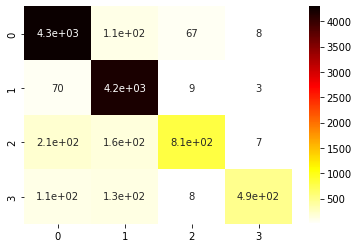

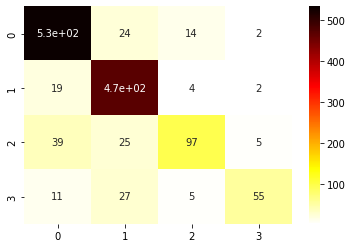

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_matrix = confusion_matrix(Y_train, train_pred)
sns.heatmap(train_matrix, annot = True, cmap = "hot_r")
plt.show()

test_matrix = confusion_matrix(Y_test, test_pred)
sns.heatmap(test_matrix, annot = True, cmap = "hot_r")
plt.show()

##56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

適合率：予測においてどれだけ正解に適合したか表す割合。(行)\
再現率：正解の値に対してどれだけ予測が正解を再現できたか表す値。(列)\
F1:2・recall・precision/(recall + presicion)適合率と再現率の調和平均\
https://qiita.com/shoku-pan/items/cef42c9a3f472eb571b9#F1-score%EF%BC%88F%E5%80%A4%EF%BC%89%E3%81%A8Fbeta-score

macro平均法:マクロ平均法により算出した評価指標とは、各クラスの評価指標の平均です。そのため、マクロ平均法を採用すると、各クラスのサンプル数の偏りに影響を受けることなく評価指標が算出できるという特徴があります。\
micro平均法:マイクロ平均法は、データセットのサンプル数全体を考慮して評価指標を算出する方法であるため、各クラスのサンプル数に偏りがある場合、サンプル数の大きいクラスの評価指標が支配的になります。\
https://di-acc2.com/analytics/ai/10801/#index_id3

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calc(Y, pred):
  ppv = precision_score(Y, pred, average = None)
  ppv_micro = precision_score(Y, pred , average = "micro").reshape(1)
  ppv_macro = precision_score(Y, pred , average = "macro").reshape(1)
  ppv = np.concatenate([ppv, ppv_micro, ppv_macro])

  recall = recall_score(Y, pred, average = None)
  recall_micro = recall_score(Y, pred , average = "micro").reshape(1)
  recall_macro = recall_score(Y, pred , average = "macro").reshape(1)
  recall = np.concatenate([recall, recall_micro, recall_macro])
  
  f1 = f1_score(Y, pred, average = None)
  f1_micro = f1_score(Y, pred , average = "micro").reshape(1)
  f1_macro = f1_score(Y, pred , average = "macro").reshape(1)
  f1 = np.concatenate([f1, f1_micro, f1_macro])

  index = ["0", "1", "2", "3", "micro", "macro"]
  scores = pd.DataFrame({"ppv": ppv, "recall":recall, "f1":f1}, index =index)

  return(scores)

In [ ]:
print(calc(Y_test, test_pred))

            ppv    recall        f1
0      0.885572  0.930314  0.907392
1      0.861060  0.949597  0.903164
2      0.808333  0.584337  0.678322
3      0.859375  0.561224  0.679012
micro  0.867316  0.867316  0.867316
macro  0.853585  0.756368  0.791972


##57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

model.coef_:偏回帰係数

argsort:並べ替えたインデックスの配列ndarrayを取得

In [ ]:
features = X_train_TFIDF_df.columns.values

for i, coef in enumerate(model.coef_):
  top = features[np.argsort(-coef)[:10]]
  worst = features[np.argsort(coef)[:10]]

  categ = ["business", "entertainment", "technology", "medical"]
  print(categ[i])
  print("top\n",top)
  print("worst\n",worst)
  print("\n")

business
top
 ['bank' 'fed' 'stocks' 'ecb' 'china' 'euro' 'oil' 'yellen' 'ukraine'
 'dollar']
worst
 ['ebola' 'she' 'aereo' 'video' 'apple' 'her' 'microsoft' 'star' 'and'
 'study']


entertainment
top
 ['kardashian' 'chris' 'she' 'movie' 'kim' 'miley' 'cyrus' 'star' 'paul'
 'george']
worst
 ['us' 'google' 'update' 'china' 'gm' 'study' 'says' 'could' 'billion'
 'data']


technology
top
 ['google' 'apple' 'facebook' 'microsoft' 'climate' 'tesla' 'gm' 'nasa'
 'comcast' 'heartbleed']
worst
 ['stocks' 'her' 'fed' 'american' 'percent' 'ukraine' 'cancer' 'ecb' 'drug'
 'movie']


medical
top
 ['ebola' 'study' 'fda' 'cancer' 'mers' 'cdc' 'drug' 'doctors' 'could'
 'cases']
worst
 ['ceo' 'facebook' 'gm' 'google' 'apple' 'bank' 'deal' 'tv' 'twitter'
 'climate']




In [ ]:
model.coef_

array([[ 0.30679626,  0.1716832 , -0.52642875, ...,  0.83045155,
        -0.65195165,  0.53317152],
       [ 0.35075625, -0.23911948,  0.00413865, ..., -0.42203418,
         1.32026433, -0.48435884],
       [-0.46897757,  0.14208424, -0.46835587, ..., -0.24933033,
        -0.31911174, -0.03568211],
       [-0.18857494, -0.07464796,  0.99064596, ..., -0.15908704,
        -0.34920094, -0.01313057]])

In [ ]:
print(np.sort(coef)[-10:])
print(np.argsort(-coef)[:10])
print(coef[456])
print(np.argsort(coef)[:10])
print(coef[259])
print(features[np.argsort(-coef)[:10]])

[2.45089128 2.46679542 2.57484735 2.68672771 2.69142997 2.96803594
 3.03622784 3.63817849 3.98334555 4.58331035]
[ 456 1497  531  233  971  252  441  419  339  248]
4.58331034549859
[ 259  509  641  650   79  118  376 1612 1615  292]
-1.2305312170796103
['ebola' 'study' 'fda' 'cancer' 'mers' 'cdc' 'drug' 'doctors' 'could'
 'cases']


##58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

正則化：損失関数に正則化を加えることによって鋭く、最適化が行われるのを防ぐ。\
https://onl.sc/T3TxLD9

np.logspace()：ログスケール上等間隔行列を返す。
    
    np.logspace(2.0, 3.0, num=4, base=2.0)
    #array([4.        ,  5.0396842 ,  6.34960421,  8.        ])

In [ ]:
result = []

for C in np.logspace(-5, 2, 10, base =np.e):

  model = LogisticRegression(C=C, max_iter = 250)
  model.fit(X_train_TFIDF, Y_train)
  train_pred1 = []
  valid_pred1 =[]
  test_pred1 =[]

  for X in X_train_TFIDF:
    train_pred1.append(score(model, X)[0])
  for X in X_valid_TFIDF:
    valid_pred1.append(score(model, X)[0])
  for X in X_test_TFIDF:
    test_pred1.append(score(model, X)[0])

  train_acc1 = accuracy_score(Y_train, train_pred1)
  valid_acc1 = accuracy_score(Y_valid, valid_pred1)
  test_acc1 = accuracy_score(Y_test, test_pred1)

  print("valid_acc", valid_acc1)

  result.append([C, train_acc1, valid_acc1, test_acc1])

result = np.array(result).T #転置


valid_acc 0.7518740629685158
valid_acc 0.7616191904047976
valid_acc 0.7683658170914542
valid_acc 0.782608695652174
valid_acc 0.8298350824587706
valid_acc 0.8590704647676162
valid_acc 0.8793103448275862
valid_acc 0.8875562218890555
valid_acc 0.8898050974512743
valid_acc 0.889055472263868


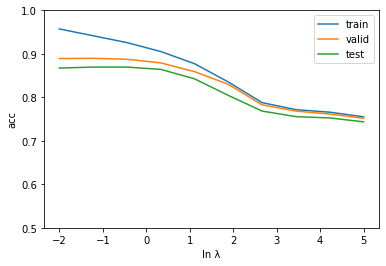

In [ ]:
plt.plot(-np.log(result[0]), result[1], label = "train") #loge
plt.plot(-np.log(result[0]), result[2], label = "valid")
plt.plot(-np.log(result[0]), result[3], label = "test")
plt.ylim(0.5, 1.0)

plt.ylabel("acc")
plt.xlabel("ln λ")
plt.legend()
plt.show()

In [ ]:
print(result)

[[6.73794700e-03 1.46660171e-02 3.19224918e-02 6.94834512e-02
  1.51239760e-01 3.29192988e-01 7.16531311e-01 1.55962350e+00
  3.39472319e+00 7.38905610e+00]
 [7.55153673e-01 7.65835832e-01 7.71645427e-01 7.87762369e-01
  8.35176162e-01 8.77342579e-01 9.05359820e-01 9.25880810e-01
  9.41622939e-01 9.57271364e-01]
 [7.51874063e-01 7.61619190e-01 7.68365817e-01 7.82608696e-01
  8.29835082e-01 8.59070465e-01 8.79310345e-01 8.87556222e-01
  8.89805097e-01 8.89055472e-01]
 [7.43628186e-01 7.52623688e-01 7.55622189e-01 7.68365817e-01
  8.04347826e-01 8.42578711e-01 8.64317841e-01 8.69565217e-01
  8.69565217e-01 8.67316342e-01]]


##59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [ ]:
!pip install optuna

trial.suggest_uniform:範囲でのパラメータの探索。\
penalty：正則化タイプ\
solver：最適化法\
パラメータ説明\
http://taustation.com/scikit-learn-logisticregression/ \
最適化法\
https://qiita.com/hannnari0918/items/a0e2184fb4ff8af9981c \
正則化説明\
https://qiita.com/c60evaporator/items/d0356fca12b37a82fe57

In [ ]:
import optuna 

def study_lr_param(trial):
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
  C = trial.suggest_loguniform("C", 1e-4, 1e4)

  model = LogisticRegression(random_state = 123, max_iter = 200,
                             penalty = "elasticnet", solver ="saga",
                             l1_ratio = l1_ratio, C = C )
  
  model.fit(X_train_TFIDF, Y_train)

  pred = model.predict(X_valid_TFIDF)
  acc = accuracy_score(Y_valid, pred)

  return acc



In [ ]:
study_lr = optuna.create_study(direction = "maximize")
study_lr.optimize(study_lr_param, n_trials =30)

[I 2022-12-22 12:45:41,619] A new study created in memory with name: no-name-4b3f2f88-6092-4749-8ecc-029f2010939d
<ipython-input-31-e09d7d25938a>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 0.7)
<ipython-input-31-e09d7d25938a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e+3)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2022-12-22 12:49:55,356] Trial 0 finished with value: 0.8515742128935532 and parameters: {'l1_ratio': 0

ナイーブベイズ分類器：
ガウシアン分布：入力変数xでガウシアン分布を仮定し、予測引数がどのガウシアン分布に最も近いかで分類わけを行う。\
https://qiita.com/ynakayama/items/ca3f5e9d762bbd50ad1f \
正則化としてalpha（Cの逆で値が大きいほど強く正則化を行う)

In [ ]:
from sklearn.naive_bayes import GaussianNB

def study_nb_param(trial):
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)

  model = GaussianNB(var_smoothing = var_smoothing)
  
  model.fit(X_train_TFIDF, Y_train)

  pred = model.predict(X_valid_TFIDF)
  acc = accuracy_score(Y_valid, pred)

  return acc


In [ ]:
study_nb = optuna.create_study(direction = "maximize")
study_nb.optimize(study_nb_param, n_trials =30)

[I 2022-12-22 13:36:21,406] A new study created in memory with name: no-name-55c7874c-a522-482b-b4c8-1750b39038a2
<ipython-input-33-151a4f7b3315>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)
[I 2022-12-22 13:36:21,687] Trial 0 finished with value: 0.7413793103448276 and parameters: {'alpha': 3.050303377852283e-09}. Best is trial 0 with value: 0.7413793103448276.
<ipython-input-33-151a4f7b3315>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)
[I 2022-12-22 13:36:21,931] Trial 1 finished with value: 0.7421289355322339 

In [ ]:
print("study_lr.best_value\n", study_lr.best_value)
print("study_nb.best_value\n", study_nb.best_value)
if study_lr.best_value > study_nb.best_value: #return値
  study = study_lr
  print("study_lr")

else:
  study = study_nb
  print("study_nb")

for k, v in study.best_params.items():
  print(k, v)
print("acc", study.best_value)

study_lr.best_value
 0.8920539730134932
study_nb.best_value
 0.7466266866566716
study_lr
l1_ratio 0.2337238436698712
C 5.403211698511446
acc 0.8920539730134932


In [ ]:
model = LogisticRegression(random_state = 123, max_iter = 200,
                             penalty = "elasticnet", solver ="saga",
                             l1_ratio = 0.2337238436698712, C = 5.403211698511446)

model.fit(X_train_TFIDF, Y_train)

pred = model.predict(X_valid_TFIDF)
acc = accuracy_score(Y_valid, pred)

print(acc)

0.8920539730134932


参考文献一覧：\
最適化:https://qiita.com/omiita/items/1735c1d048fe5f611f80 \
動画：https://www.youtube.com/watch?v=is9A4CSal-g